In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import time
from IPython import display
import numpy as np

In [2]:
def load_data_airfoil():
    data = np.genfromtxt('/home/data/airfoil_self_noise.dat',delimiter='\t')
    data  = (data-data.mean(axis=0))/data.std(axis=0)
    features = torch.tensor(data[:1500,:-1],dtype=torch.float32)
    labels = torch.tensor(data[:1500,-1],dtype=torch.float32)
    return features,labels
features,labels = load_data_airfoil()

In [9]:
def train_ch7(optimizer_fn,optimizer_hyperparameter,features,labels,batch_size=10,num_epochs=2):
    net = nn.Sequential(
        nn.Linear(features.shape[-1],1)
    )
    loss  = nn.MSELoss()
    optimizer = optimizer_fn(net.parameters(),**optimizer_hyperparameter)
    def eval_loss():
        return loss(net(features).view(-1),labels).item()/2
    ls = [eval_loss()]
    print('ls:',ls)
    data = torch.utils.data.TensorDataset(features,labels)
    data_iter = torch.utils.data.DataLoader(data,batch_size,shuffle=True)
    for epoch in range(num_epochs):
        start = time.time()
        for batch_i,(X,Y)in enumerate(data_iter):
            print(batch_i)
            y_hat = net(X)
            l = loss(y_hat.view(-1),Y)/2
            optimizer.zero_grad()
            l.backward()
            optimizer.step()
            if (batch_i+1)*batch_size%100==0:
                ls.append(eval_loss())
    print('loss:%f,%f sec pre epoch'%(ls[-1],time.time()-start))
    display.set_matplotlib_formats('svg')
    plt.rcParams['figure.figsize'] = (6,6)
    plt.plot(np.linspace(0,num_epochs,len(ls)),ls)
    plt.xlabel('epochs:')
    plt.ylabel('loss:')


ls: [0.45057177543640137]
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
14

/tmp/ipykernel_11339/2135164263.py:25: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


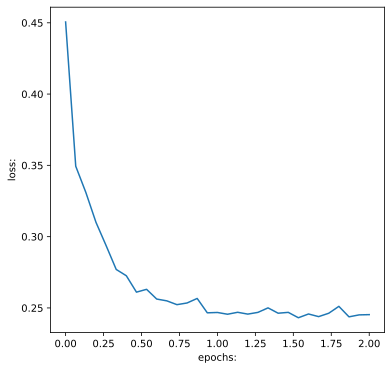

In [4]:
 train_ch7(torch.optim.SGD,{'lr':0.05},features,labels,10)


ls: [0.5593485236167908]
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148

/tmp/ipykernel_11339/2135164263.py:25: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


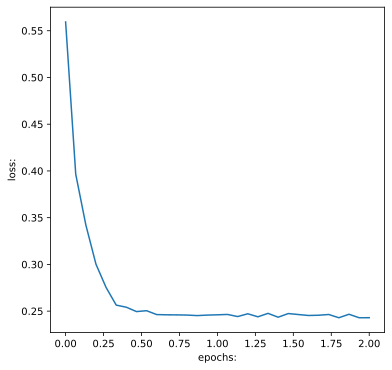

In [5]:
 train_ch7(torch.optim.ASGD,{'lr':0.05},features,labels,10)